# DT, RF, GB 회귀(Regressor)

In [34]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
# export_graphviz 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할 train, test
from sklearn.model_selection import train_test_split
# 예측 / 회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['font.size'] = 14

# - 부호 표시를 위한 코드
mpl.rc('axes', unicode_minus = False)
import seaborn as sns

In [3]:
df_raw = pd.read_csv('./datasets/concrete.csv',encoding='euc-kr')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
print(df_raw.isnull().sum())
df_raw.head()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


C:\Users\winju\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


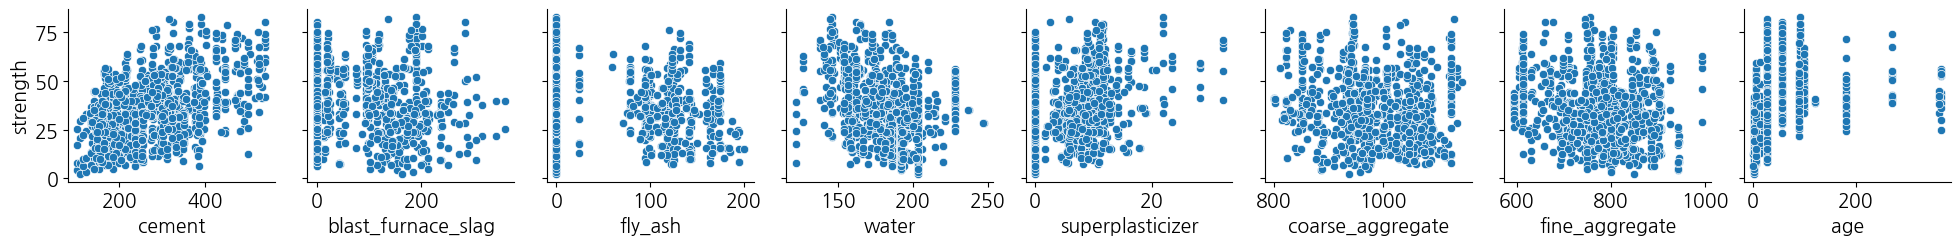

In [6]:
sns.pairplot(df_raw, y_vars="strength", x_vars = ['cement',"blast_furnace_slag", "fly_ash",'water', "superplasticizer",
                                                 "coarse_aggregate",'fine_aggregate','age'])

- 결측값 확인 결과 이상없음

## 데이터분할

In [7]:
# linear regressor : train/test 분할
df_train_lr, df_test_lr = train_test_split(df_raw, test_size=0.4, random_state=1234)

In [8]:
df_raw_y = df_raw['strength']

In [9]:
df_raw_x = df_raw.drop(['strength'],axis=1,inplace =False)

In [10]:
# DT, RF, GB : train/test 분할
df_train_x, df_test_x , df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                 test_size=0.4, random_state=1234)
print("train data size : {}".format(df_train_x.shape))
print("train data size : {}".format(df_train_y.shape))
print("test data size : {}".format(df_test_x.shape))
print("test data size : {}".format(df_test_y.shape))

train data size : (618, 8)
train data size : (618,)
test data size : (412, 8)
test data size : (412,)


## DecisionTreeRegressor

In [11]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
#train / test 설명력
print('score on training set :', tree_uncustomized.score(df_train_x, df_train_y))
print('score on test set :', tree_uncustomized.score(df_test_x, df_test_y))

score on training set : 0.9960097657947793
score on test set : 0.7897900103338475


- 모델 설명력은 train 에서 99.6% , test 에서 79% 로 모델은 train 데이터에 과대적합 이다.

In [12]:
tree_uncustomized.get_params() # 현재 생성된 트리 모델의 옵션 확인

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [13]:
# 모델 Parameter 조정
# train, test 설명력 결과 저장
train_score, test_score = [], []  # 괄호를 사용하여 변수 할당

# min_samples_leaf 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [14]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.996,0.790
1,2,0.978,0.783
2,3,0.959,0.786
3,4,0.943,0.796
4,5,0.934,0.811
5,6,0.920,0.810
6,7,0.909,0.799
7,8,0.900,0.792
8,9,0.877,0.817
9,10,0.868,0.816


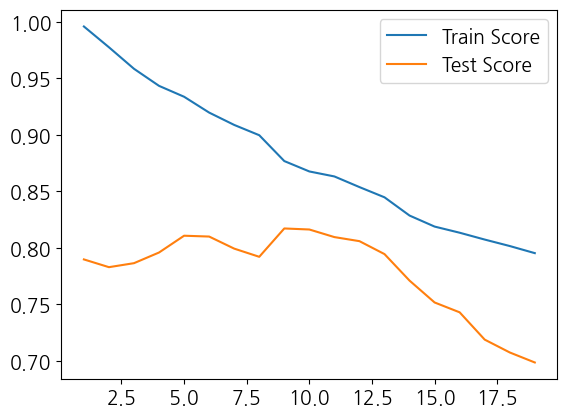

In [15]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.legend()

- 잎사귀 노드 최소 자료수 증가에 따라 train 데이터 모델의 설명력 감소
- train 데이터의 성능 최대 / test 데이터 성능 최대를 고려하여 MinSamplesLeaf = 8 선택

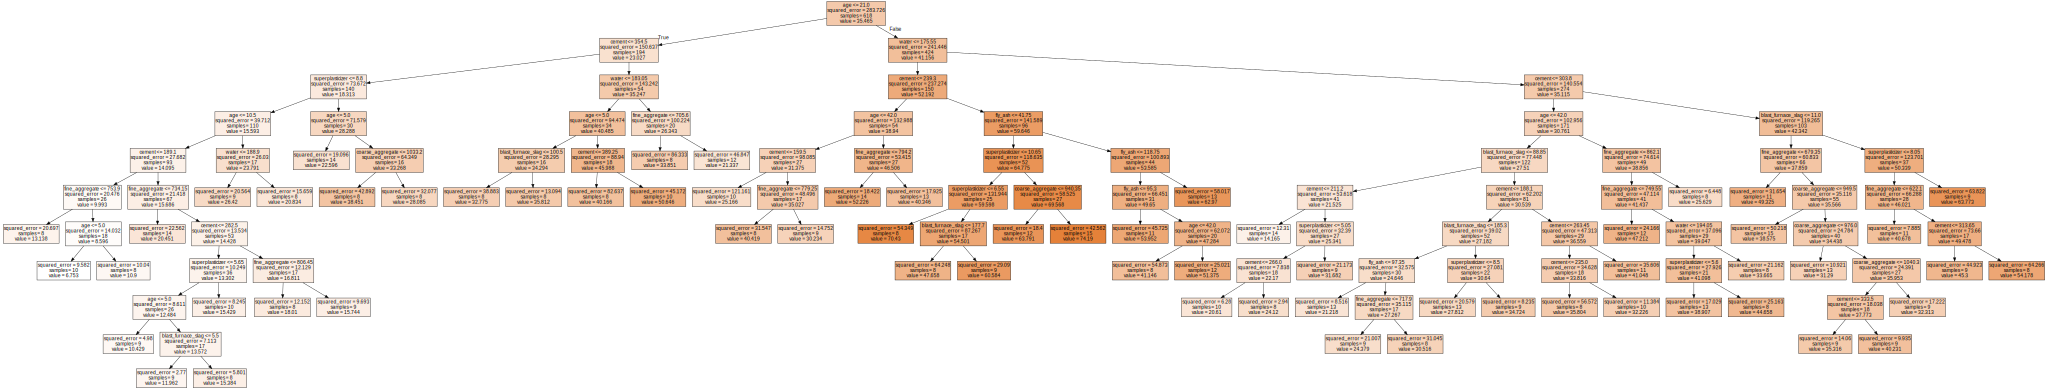

In [16]:
#변수명 저장
v_feature_name = df_train_x.columns
#노드 최소 자료수= 8 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot', feature_names = v_feature_name, impurity = True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [17]:
#train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split : 분리 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.900,0.792
1,6,0.900,0.792
2,8,0.900,0.792
3,10,0.900,0.792
4,12,0.900,0.792
5,14,0.900,0.792
6,16,0.900,0.792
7,18,0.887,0.798
8,20,0.882,0.802
9,22,0.874,0.802


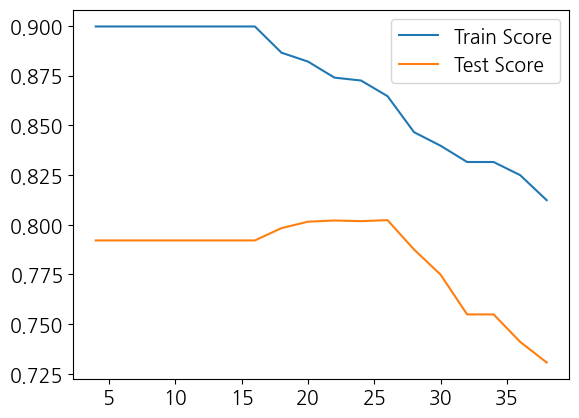

In [18]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.legend()

- 분리 노드의 최소 자료수 증가에 따라 모델 설명력 감소
- train / test 데이터 성능 변화를 고려하여 MinSamplesSplit = 20 선택

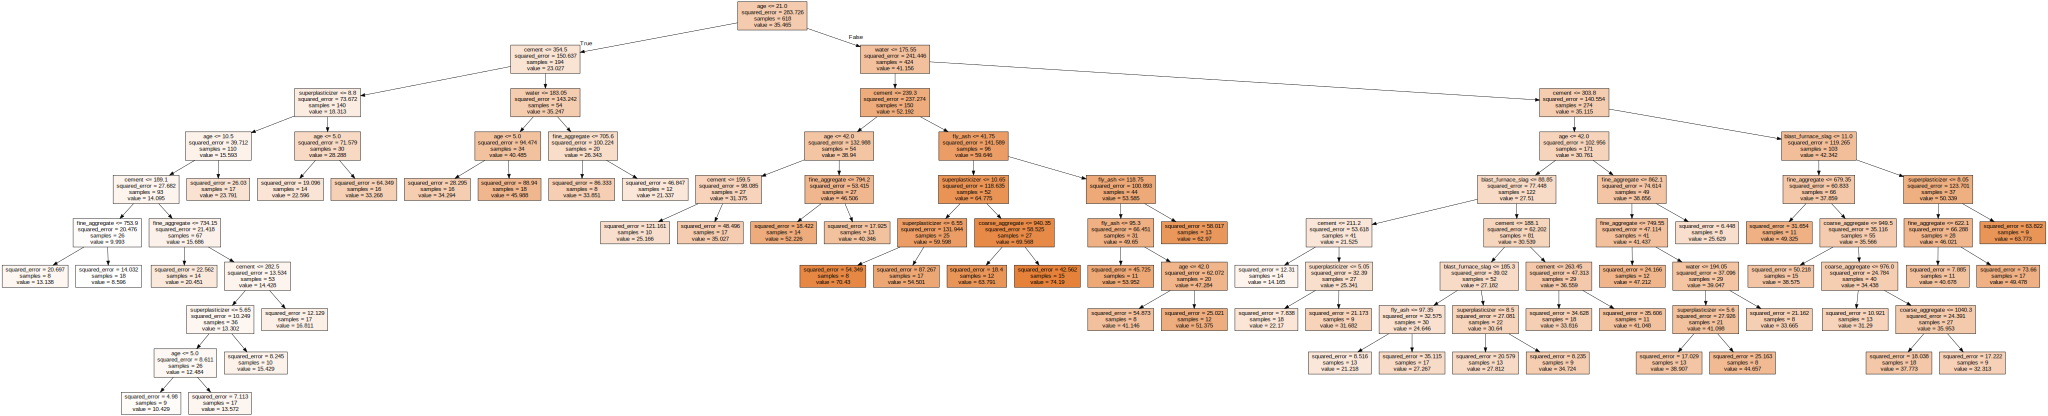

In [19]:
#노드 최소 자료수= 20 모델
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8 ,min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot', feature_names = v_feature_name, impurity = True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

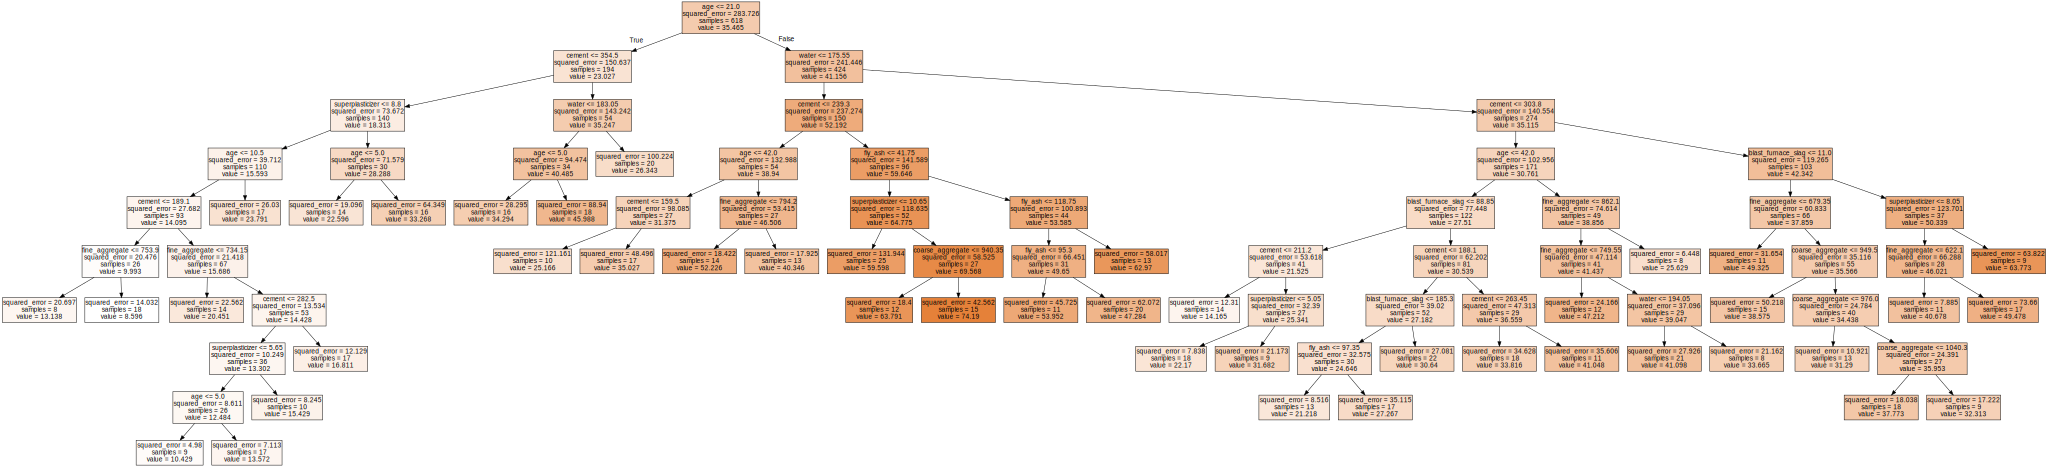

In [20]:
#노드 최소 자료수= 26 모델
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8 ,min_samples_split=26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot', feature_names = v_feature_name, impurity = True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [21]:
# 최종 모델 선정

#변수명 저장
v_feature_name = df_train_x.columns
#노드 최소 자료수= 8 모델
tree_final = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20, max_depth = 4 , random_state=1234)
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [22]:
test_pred = tree_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 369     15.34
544     14.60
500     57.92
199     15.04
262     44.40
1002    57.22
679     33.00
330     42.22
477     23.35
405     69.84
Name: strength, dtype: float64
test data의 예측값 : 
 [22.59571429 14.09473118 50.33891892 14.09473118 46.50592593 50.33891892
 27.50959016 33.268125   34.29375    64.775     ]


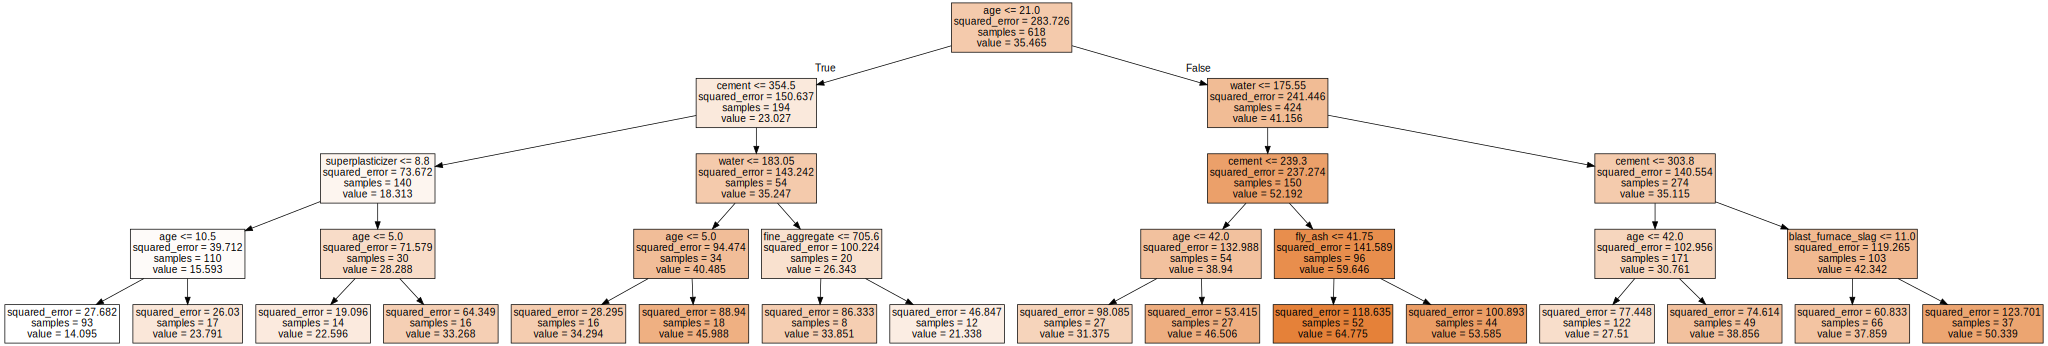

In [23]:
#최종 모델 시각화
export_graphviz(tree_final, out_file='tree_final.dot', feature_names = v_feature_name, impurity = True, filled=True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 트리 분리에 영향이 큰 변수는 AGE, CEMENT, WATER 등
- 양생 시간(AGE) <= 21.0 이면 True(자료수 194, 인장 평균강도 감소(35.465 -> 23.027), MSE 감소)
- 양생 시간(AGE) > 21.0 이면 False(자료수 424, 인장 평균강도 증가(35.465 -> 41.156), MSE 감소)
- 분리 조건이 좌측이 True, 우측이 False 적용
- 최대깊이가 증가하면서 생성되는 잎사귀(leaf)의 자료 수 감소, 모델의 MSE도 지속적으로 감소하지만 분리조건에 따라
- 인장강도(strength)는 상위 노드 대비 증감이 있음

In [24]:
#tree.feature_importances 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.416
0,cement,0.264
3,water,0.234
4,superplasticizer,0.029
1,blast_furnace_slag,0.028
2,fly_ash,0.023
6,fine_aggregate,0.006
5,coarse_aggregate,0.000


Text(0, 0.5, '변수')

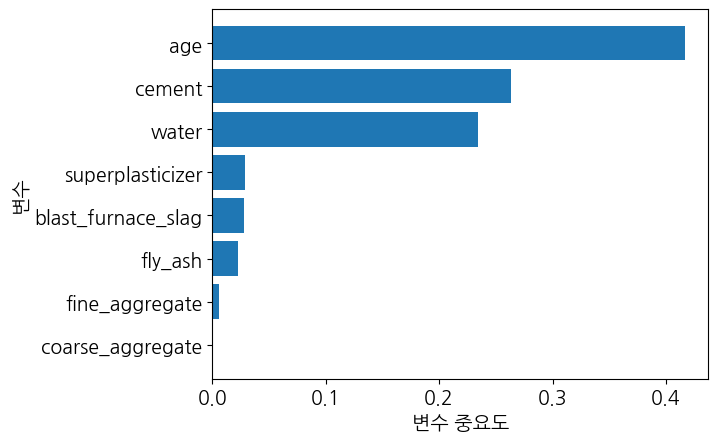

In [25]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace= True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

- 중요 설명변수 : 양생시간(AGE), 시멘트 양(CEMENT), 시멘트 물의 양(WATER) 순으로 영향이 크다고 해석가능
- 계산된 변수 중요도 값이 낮거나 0이라도 선택되는 데이터에 따라 중요도가 변할 수 있음

## RandomForestRegressor

In [26]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [27]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 설명력
print('score on training set :', rf_uncustomized.score(df_train_x, df_train_y))
#test 설명력
print('score on test set :', rf_uncustomized.score(df_test_x, df_test_y))

score on training set : 0.9800682149756418
score on test set : 0.9039869428909874


In [28]:
#현재 생성된 트리 모델 옵션확인
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [29]:
# 모델 Parameter 조정
# train, test 설명력 결과 저장
train_score = []
test_score = []  # 괄호를 사용하여 변수 할당

# n_estimatos 트리 수 변경 10 ~ 100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree :
    rf = RandomForestRegressor(n_estimators= v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.973,0.905
1,20,0.978,0.905
2,30,0.979,0.903
3,40,0.979,0.905
4,50,0.980,0.905
5,60,0.980,0.906
6,70,0.980,0.906
7,80,0.980,0.906
8,90,0.980,0.905
9,100,0.980,0.904


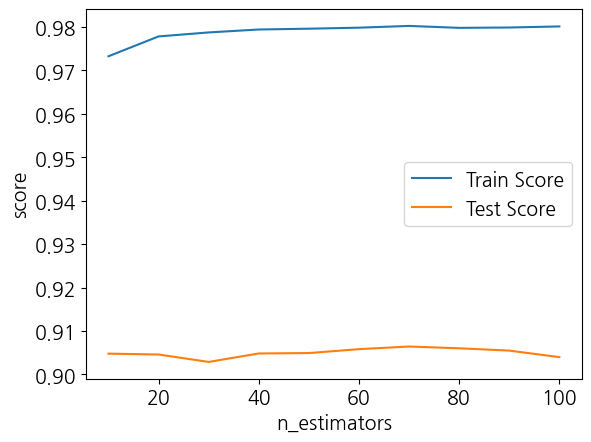

In [30]:
plt.plot(para_n_tree, train_score, linestyle ='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle ='-', label='Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

- 생성하는 결정 트리 수 증가에 따라 모델의 설명력은 약소하게 증가
- 트리 수가 30개를 초과해도 설명력은 거의 향상되지 않음
- 다른 파라미터 영향을 보기위해 50 선택

In [31]:
# 모델 파라미터 조정 - min_samples_leaf : 잎사귀 노드 최소 자료 수 변경에 따른 모델 성능

#train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split : 분리 노드의 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 21)]
# para_leaf = [1,2,3,...20]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 50 , min_samples_leaf = v_min_samples_leaf )
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesleaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesleaf,TrainScore,TestScore
0,1,0.980,0.905
1,2,0.967,0.900
2,3,0.952,0.891
3,4,0.938,0.878
4,5,0.925,0.869
5,6,0.913,0.857
6,7,0.902,0.850
7,8,0.895,0.846
8,9,0.886,0.836
9,10,0.876,0.823


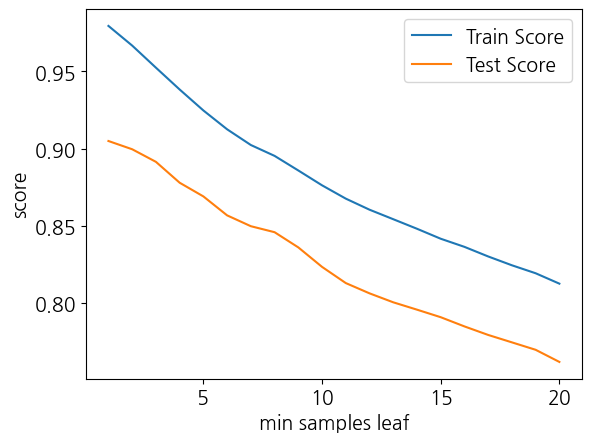

In [32]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

- 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소
- test 데이터의 정확도 변화를 고려하여 MinSamplesLeaf -> 6 을 선택

In [33]:
# 모델 parameter 조정
#train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split : 분리 노드의 최소 자료 수 변경
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 50 , min_samples_leaf=6, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.913,0.857
1,6,0.913,0.857
2,8,0.913,0.857
3,10,0.913,0.857
4,12,0.913,0.857
5,14,0.908,0.854
6,16,0.903,0.851
7,18,0.897,0.844
8,20,0.890,0.837
9,22,0.885,0.830


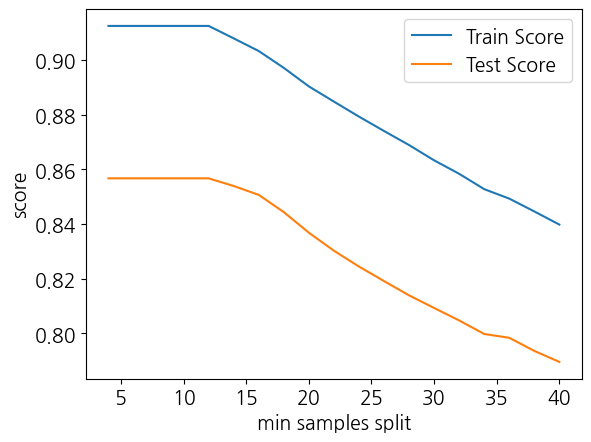

In [34]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples split')
plt.legend()

- 분리 노드 최소 자료 수 12에서 증가함에 따라 모델의 설명력은 감소
- train / test 데이터의 성능 변화를 고려하여 12 선택

In [35]:
# 모델 parameter 조정
#train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split : 분리 노드의 최소 자료 수 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 50 , min_samples_leaf=6, min_samples_split = 12, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
# 모델 설명력 확인
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.336,0.327
1,2,0.612,0.591
2,3,0.737,0.693
3,4,0.813,0.769
4,5,0.870,0.821
5,6,0.895,0.845
6,7,0.906,0.853
7,8,0.910,0.856
8,9,0.912,0.856
9,10,0.912,0.856


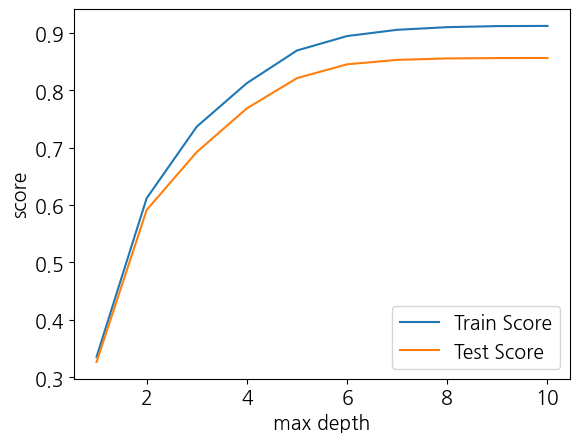

In [36]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.xlabel('max depth')
plt.legend()

- 최대 깊이 증가에 따라 모델의 설명력이 크게 증가함 그러나 최대 깊이 para_depth -> 6 에서부터 증가율이 낮아짐
- train / test 데이터 정확도 변화를 고려하여 6 선택

In [37]:
# 최종 모델 선정
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 50 , min_samples_leaf=6, min_samples_split = 12, max_depth = 6)
rf_final.fit(df_train_x, df_train_y)
#train 설명력
print('score on training set :', rf_final.score(df_train_x, df_train_y))
#test 설명력
print('score on test set :', rf_final.score(df_test_x, df_test_y))

score on training set : 0.8946365709624372
score on test set : 0.8454174318125894


In [38]:
test_pred = rf_final.predict(df_test_x)
print('test data 실제값 : ', df_test_y[:10])
print('test data 예측값 : ', test_pred[:10])

test data 실제값 :  369     15.34
544     14.60
500     57.92
199     15.04
262     44.40
1002    57.22
679     33.00
330     42.22
477     23.35
405     69.84
Name: strength, dtype: float64
test data 예측값 :  [21.77892729 15.55746839 50.1529281  14.138222   45.09224565 48.88049804
 33.01353411 32.64912909 34.5575466  64.42710191]


In [39]:
#파라미터 값 확인
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [40]:
# 결론도출 최종 모델 시각화

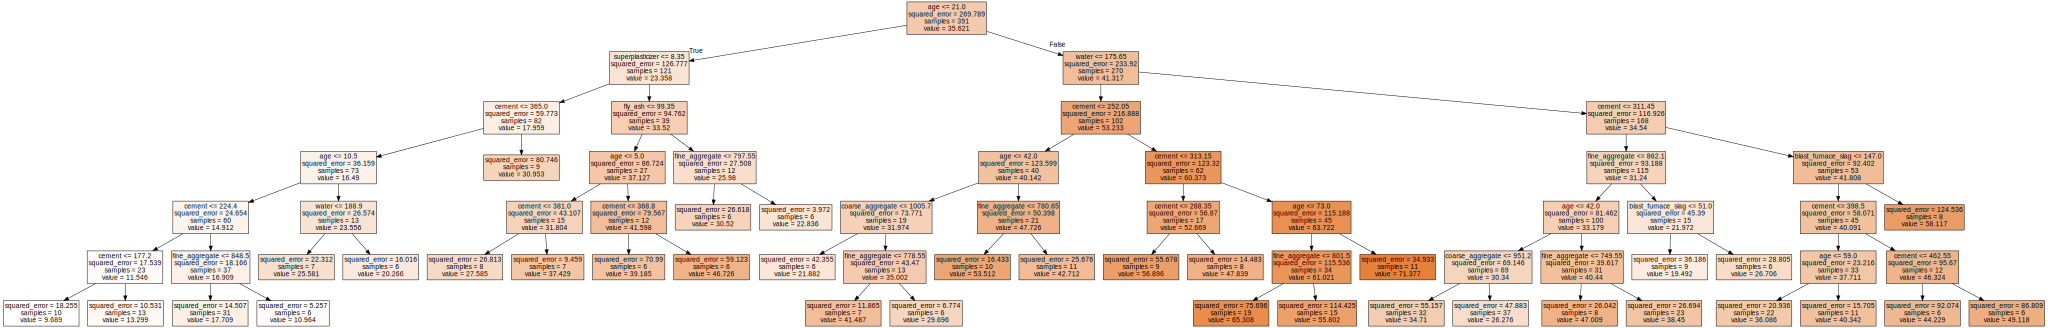

In [41]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
export_graphviz(rf_final.estimators_[0] , out_file='rfr_final_0.dot', feature_names = v_feature_name, impurity = True, filled=True)
# tree_final_0.dot 그리기
with open('rfr_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

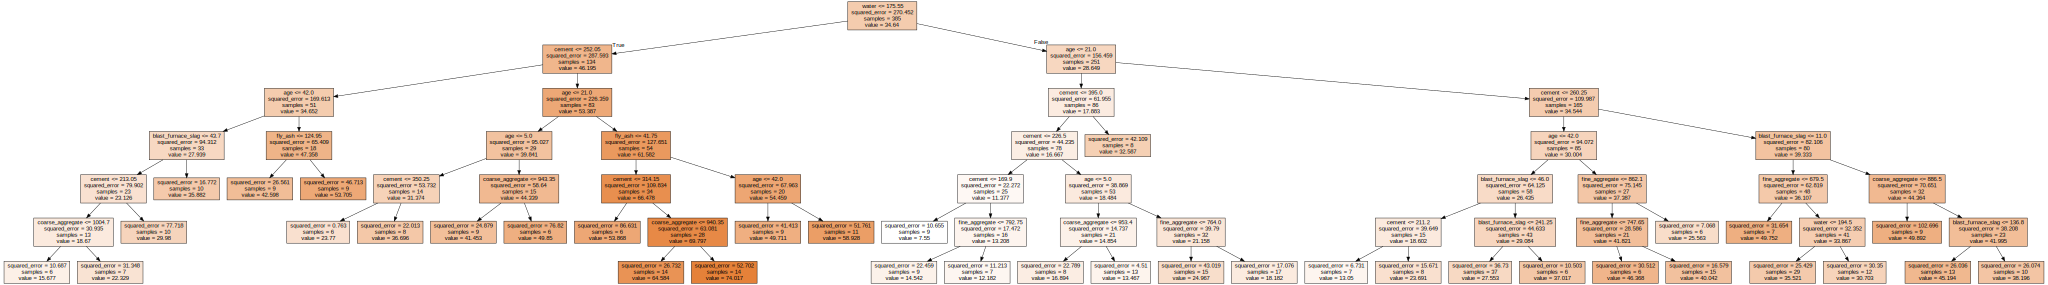

In [42]:
# 1번 트리
export_graphviz(rf_final.estimators_[1] , out_file='rfr_final_1.dot', feature_names = v_feature_name, impurity = True, filled=True)
# tree_final_1.dot 그리기
with open('rfr_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

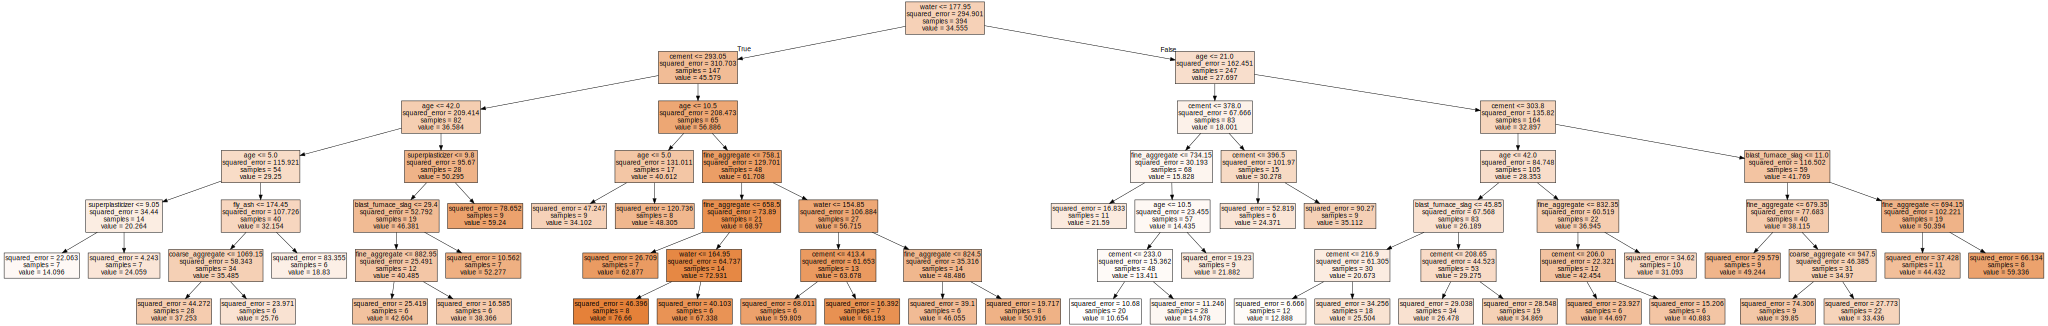

In [43]:
# 10번 트리
export_graphviz(rf_final.estimators_[10] , out_file='rfr_final_10.dot', feature_names = v_feature_name, impurity = True, filled=True)
# tree_final_10.dot 그리기
with open('rfr_final_10.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 위와 같은 트리 50개 를 조합하여 최종 모델이 생성됨

In [44]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance']= rf_final.feature_importances_

# df_feature_importance 의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,age,0.382
0,cement,0.272
3,water,0.155
4,superplasticizer,0.080
1,blast_furnace_slag,0.045
6,fine_aggregate,0.039
5,coarse_aggregate,0.016
2,fly_ash,0.011


Text(0, 0.5, '변수')

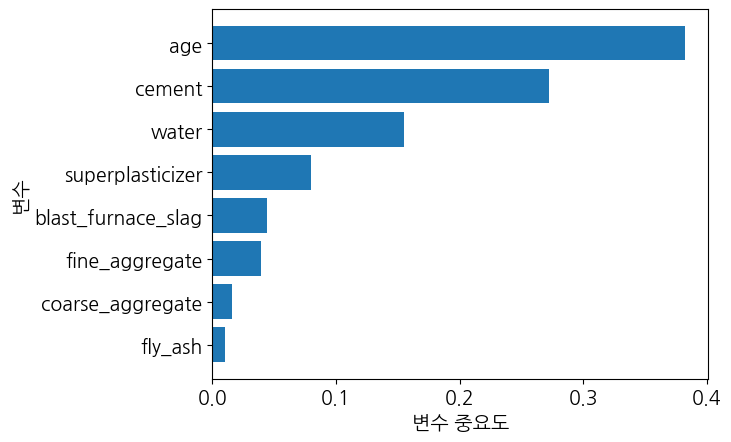

In [45]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace= True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

- 중요 설명변수 : 양생 시간(age), 시멘트 양(cement), 시멘트 물의 양(water) 순으로 영향이 크다고 해석할 수 있음
- 계산된 변수 중요도 값이 낮거나 0이라도 선택되는 데이터에 따라 중요도가 변할 수 있음

## GradientBoostingRegressor

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [47]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
#train 설명력
print('score on training set :', gb_uncustomized.score(df_train_x, df_train_y))
#test 설명력
print('score on test set :', gb_uncustomized.score(df_test_x, df_test_y))

score on training set : 0.9505134135017139
score on test set : 0.9145895044861685


- 모델 설명력은 train 에서 95.0% , test 에서 58.3% 로 모델은 train 데이터에 과대적합 이다.

In [48]:
gb_uncustomized.get_params() # 현재 생성된 트리 모델의 옵션 확인

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [49]:
# 모델 Parameter 조정
# train, test 설명력 결과 저장
train_score, test_score = [], []  # 괄호를 사용하여 변수 할당

# min_samples_leaf 잎사귀 최소 자료 수
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n['e_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n.round(3)

,e_estimators,TrainScore,TestScore
0,10,0.646,0.621
1,20,0.807,0.773
2,30,0.870,0.835
3,40,0.898,0.863
4,50,0.915,0.878
5,60,0.925,0.888
6,70,0.934,0.898
7,80,0.940,0.904
8,90,0.946,0.910
9,100,0.951,0.915


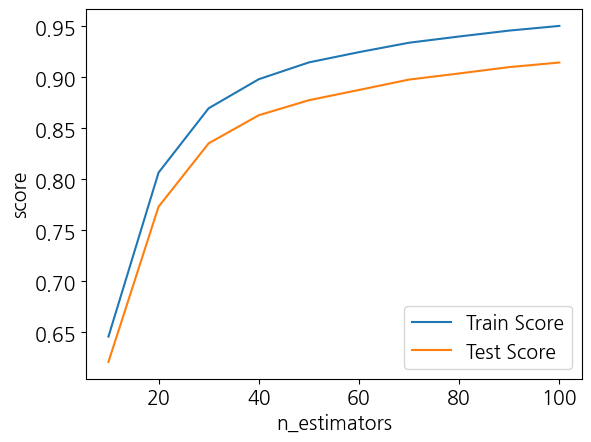

In [50]:
plt.plot(para_n_tree, train_score, linestyle ='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle ='-', label='Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

- 트리 수 증가에 따라 모델의 설명력은 지속적으로 향상되고 있음
- Test 데이터의 성능 변화를 고려하여 n_estimators -> 50 선택

In [51]:
# 모델 Parameter 조정
# train, test 설명력 결과 저장
train_score = []
test_score = []  # 괄호를 사용하여 변수 할당

# min_samples_leaf 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators= 50, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.915,0.878
1,2,0.914,0.877
2,3,0.911,0.876
3,4,0.911,0.878
4,5,0.912,0.878
5,6,0.910,0.880
6,7,0.910,0.878
7,8,0.911,0.879
8,9,0.909,0.881
9,10,0.907,0.876


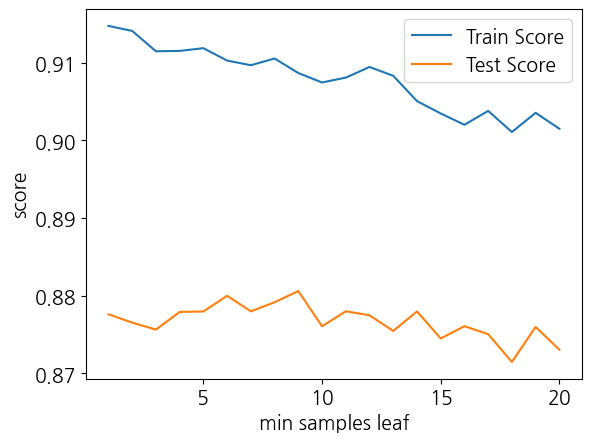

In [52]:
plt.plot(para_leaf, train_score, linestyle ='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle ='-', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

- 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소
- test 데이터의 성능 변화를 고려해 minsampleleaf -> 6 선택

In [53]:
#train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=50 , min_samples_leaf=6, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.910,0.880
1,4,0.910,0.880
2,6,0.910,0.880
3,8,0.910,0.880
4,10,0.910,0.880
5,12,0.910,0.880
6,14,0.911,0.880
7,16,0.910,0.880
8,18,0.910,0.880
9,20,0.910,0.880


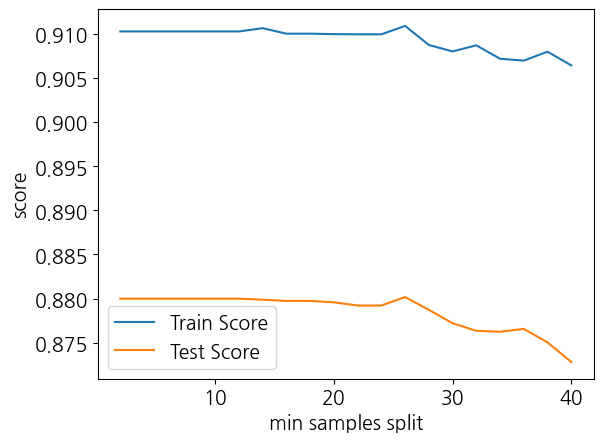

In [54]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples split')
plt.legend()

- 분리 노드의 최소 자료수 28 이상에서는 모델 설명력 감소
- train / test 데이터 성능 변화를 고려하여 MinSamplesSplit = 20 선택
- 20보다 적은 영역에서는 변화가 없음

In [55]:
# 모델 parameter 조정
#train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split : 분리 노드의 최소 자료 수 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 50 , min_samples_leaf= 6, min_samples_split = 20, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.715,0.692
1,2,0.862,0.834
2,3,0.910,0.880
3,4,0.943,0.899
4,5,0.967,0.910
5,6,0.974,0.920
6,7,0.979,0.921
7,8,0.983,0.924
8,9,0.985,0.921
9,10,0.985,0.925


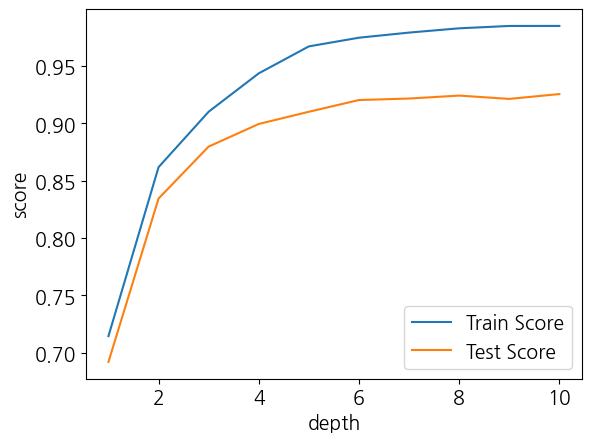

In [56]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.xlabel('depth')
plt.legend()

- 최대 깊이 증가에 따라 모델 설명력이 증가함
- test 데이터 성능 변화를 고려해 depth는 6을 선택함

In [57]:
# 모델 parameter 조정
#train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split : 분리 노드의 최소 자료 수 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 50 , min_samples_leaf= 6, min_samples_split = 20, max_depth = 6, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score
# 학습률 변경에 따른 모델 설명력 확인
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.974,0.920
1,0.2,0.984,0.928
2,0.3,0.988,0.935
3,0.4,0.990,0.922
4,0.5,0.990,0.924
5,0.6,0.992,0.912
6,0.7,0.993,0.909
7,0.8,0.994,0.888
8,0.9,0.994,0.876


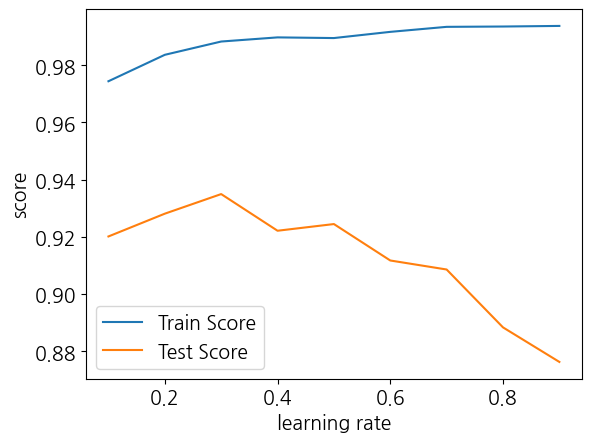

In [58]:
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.xlabel('learning rate')
plt.legend()

- 학습률 증가에 따라 모델의 설명력이 증가하나 학습률이 0.3에서 test 성능이 급감함
- 학습률은 0.3 을 선택한다

In [59]:
# 최종 모델 선정

gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 50 , min_samples_leaf= 6 , min_samples_split = 20, max_depth = 6, learning_rate=0.3)
gb_final.fit(df_train_x, df_train_y)
#train 설명력
print('score on training set :', gb_final.score(df_train_x, df_train_y))
#test 설명력
print('score on test set :', gb_final.score(df_test_x, df_test_y))

score on training set : 0.9882943824575057
score on test set : 0.9350559228112805


In [60]:
test_pred = gb_final.predict(df_test_x)
print('test data 실제값 : ', df_test_y[:10])
print('test data 예측값 : ', test_pred[:10])

test data 실제값 :  369     15.34
544     14.60
500     57.92
199     15.04
262     44.40
1002    57.22
679     33.00
330     42.22
477     23.35
405     69.84
Name: strength, dtype: float64
test data 예측값 :  [19.04906671 16.60117526 54.53509861 14.88940673 43.46453772 55.40064718
 31.09750814 36.46443326 31.55735571 66.42479553]


In [61]:
#파라미터 값 확인
gb_final.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.3,
 'loss': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [62]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance']= gb_final.feature_importances_

# df_feature_importance 의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,age,0.331
0,cement,0.278
3,water,0.153
4,superplasticizer,0.081
1,blast_furnace_slag,0.058
6,fine_aggregate,0.048
5,coarse_aggregate,0.027
2,fly_ash,0.024


Text(0, 0.5, '변수')

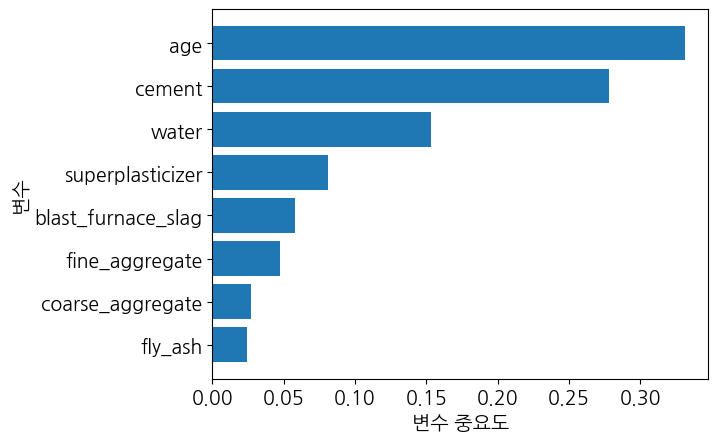

In [63]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace= True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

- 중요 설명변수 : 양생시간(age), 시멘트 양(cement), 시멘트 물의 양(water) 순으로 영향이 크다고 할 수 있다.
- 그러나 계산된 변수 중요도 값이 낮거나 0이라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

## 모델 비교평가

In [64]:
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.formula.api as smf

from statsmodels.api import qqplot, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

In [65]:
# 평가함수 RMSE : root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
# 평가함수 MAPE : mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [66]:
#회귀모델
lr_model = smf.ols(formula = 'strength ~ age + cement + water + superplasticizer', data = df_train_lr)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.15e-94
Time:                        03:11:51   Log-Likelihood:                -2399.0
No. Observations:                 618   AIC:                             4808.
Df Residuals:                     613   BIC:                             4830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           36.1835      6.243  

In [67]:
# 의사결정나무
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8 , min_samples_split=20 , max_depth = 4 )
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

In [68]:
# 랜덤포레스트
rf_model = RandomForestRegressor(random_state=1234, n_estimators=50 , min_samples_leaf= 6 , min_samples_split=12 , max_depth= 6)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=6, min_samples_leaf=6, min_samples_split=12,
                      n_estimators=50, random_state=1234)

In [69]:
# 그레디언트 부스트
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators= 50, min_samples_leaf= 6, min_samples_split= 20, max_depth= 6, learning_rate=0.3 )
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(learning_rate=0.3, max_depth=6, min_samples_leaf=6,
                          min_samples_split=20, n_estimators=50,
                          random_state=1234)

In [70]:
# 모델 리스트, 그래프 그리기
models = ['회귀분석','의사결정나무','랜덤 포레스트','그레디언트 부스팅']
# 평가 리스트 초기화
mse,rmse,mae,mape= [],[],[],[]
# 선형회귀 예측
lr_y_pred = lr_result.predict(df_test_lr)
# 선형회귀 평가
mse.append(mean_squared_error(df_test_lr['strength'], lr_y_pred))
rmse.append(root_mean_squared_error(df_test_lr['strength'], lr_y_pred))
mae.append(mean_absolute_error(df_test_lr['strength'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_lr['strength'], lr_y_pred))

In [71]:
# 의사결정나무 예측
dt_y_pred = dt_model.predict(df_test_x)
# 의사결정나무 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [72]:
# 랜덤포레스트 예측
rt_y_pred = dt_model.predict(df_test_x)
# 랜덤포레스트 평가
mse.append(mean_squared_error(df_test_y, rt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rt_y_pred))
mae.append(mean_absolute_error(df_test_y, rt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rt_y_pred))

In [73]:
# 그레디언트 부스팅 예측
gb_y_pred = gb_model.predict(df_test_x)
# 그레디언트 부스팅 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

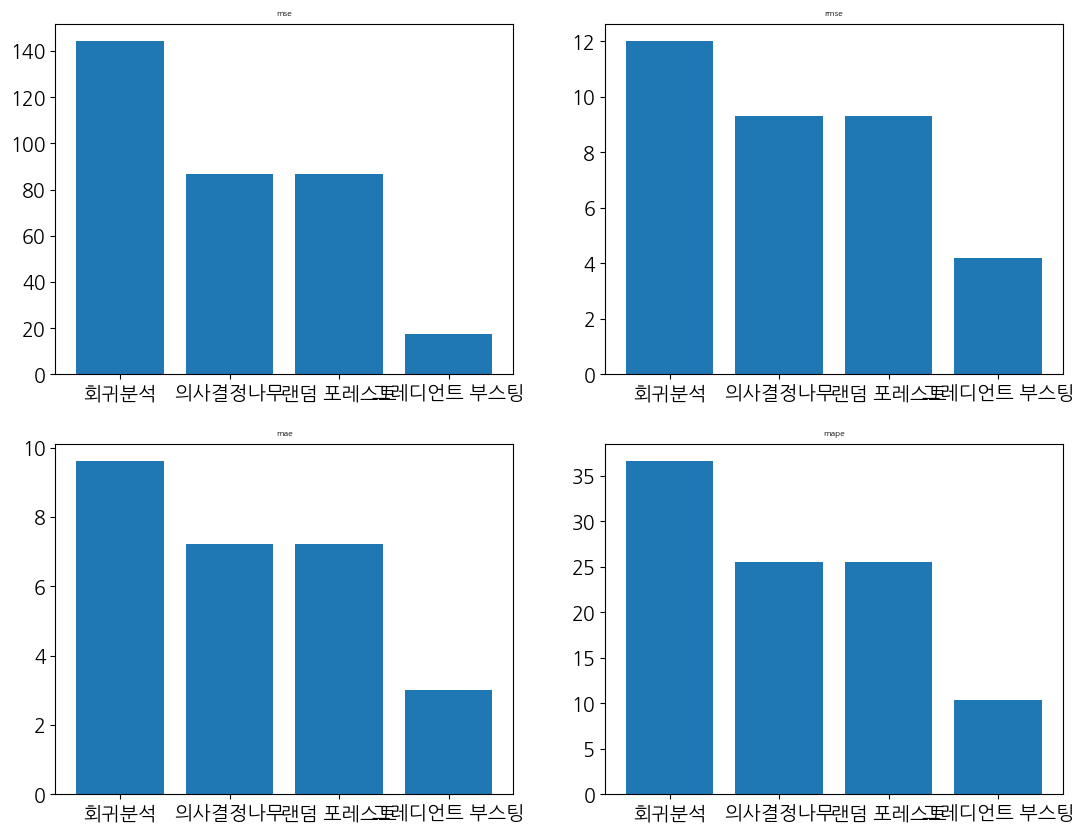

In [74]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(6)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(6)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(6)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(6)

- 일반 Regression 으로 선택된 설명변수를 선형회귀모델, 그레디언트 부스팅의 성능이 높고 반면 의사결정나무와 랜덤포레스트의 성능이 낮음
- 평가지표별 모델의 정확도 추세는 유사하게 나타남

# HW6 - PCA 주성분

In [2]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
# export_graphviz 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할 train, test
from sklearn.model_selection import train_test_split
# 예측 / 회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
import statsmodels.api as sm

In [3]:
df_raw = pd.read_csv('./datasets/체질검사.csv',encoding='euc-kr')
display(df_raw.head())
display(df_raw.info())

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


None

In [29]:
df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')

In [30]:
df_raw = df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'], axis = 1)

df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


In [31]:
df_raw_x = df_raw_dummy.drop('FAT',axis=1)
df_raw_y = df_raw_dummy['FAT']
df_raw_y.head()

0    35.2
1    11.8
2    22.2
3    10.6
4    47.5
Name: FAT, dtype: float64

In [32]:
df_raw_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


In [ ]:
# df_raw = df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'], axis = 1)

# df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
# df_raw_dummy.head()

In [ ]:
import seaborn as sns
sns.pairplot(df_raw_x)

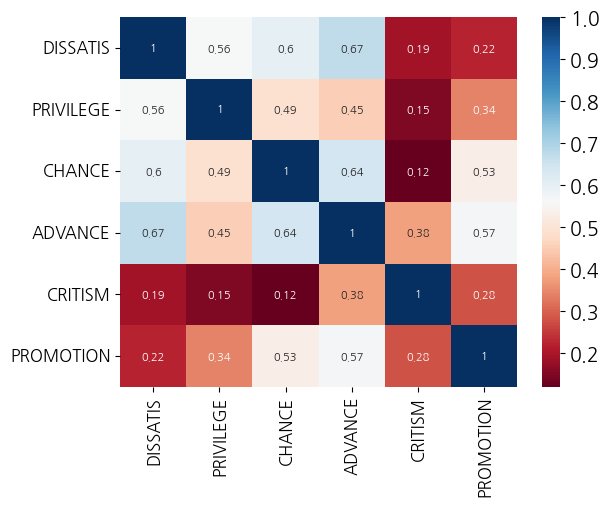

In [80]:
sns.heatmap(df_raw_x.corr().round(2),
            annot= True, annot_kws= {'size':8},
            cmap= 'RdBu')
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

- DISSATIS 와 CHANCE 에서 (0.6)의 높은 상관관계, ADVANCE 에서 (0.669)의 높은 상관관계를 가짐
- CHANCE 는 ADVANCE 에서 (0.64)의 상관관계를 가짐

In [37]:
# 요약 통계량 -> Scale 변환 필요 확인
df_raw_x.describe().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,44.885,178.924,70.149,37.992,100.824,92.556,99.905,59.406,38.590,23.102,32.273,28.664,18.230,0.425
std,12.602,29.389,3.663,2.431,8.430,10.783,7.164,5.250,2.412,1.695,3.021,2.021,0.934,0.495
min,22.000,118.500,29.500,31.100,79.300,69.400,85.000,47.200,33.000,19.100,24.800,21.000,15.800,0.000
25%,35.750,159.000,68.250,36.400,94.350,84.575,95.500,56.000,36.975,22.000,30.200,27.300,17.600,0.000
50%,43.000,176.500,70.000,38.000,99.650,90.950,99.300,59.000,38.500,22.800,32.050,28.700,18.300,0.000
75%,54.000,197.000,72.250,39.425,105.375,99.325,103.525,62.350,39.925,24.000,34.325,30.000,18.800,1.000
max,81.000,363.150,77.750,51.200,136.200,148.100,147.700,87.300,49.100,33.900,45.000,34.900,21.400,1.000


In [39]:
from sklearn.preprocessing import StandardScaler
# 변수 이름 저장
x_cols = df_raw_x.columns
# Scale 변환 : ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# 변환된 데이터 및 형태 확인
print("Scaled Data : ",nd_scaled[:5].round(3))
print('Shape : ',nd_scaled.shape)

Scaled Data :  [[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403 -0.859]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612 -0.859]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612 -0.859]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427  1.164]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183  1.164]]
Shape :  (252, 14)


In [40]:
# DataFrame 으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,0.089,6.281,0.575,5.444,4.205,5.161,6.685,5.324,4.366,3.841,4.221,0.167,3.403,-0.859
1,-1.422,-0.372,0.301,0.044,-0.930,-1.250,-0.756,-0.402,-0.993,0.826,-1.086,0.663,0.612,-0.859
2,1.917,-0.040,-0.451,0.292,0.140,0.227,-0.224,-0.841,-0.121,-0.770,-0.489,-1.470,0.612,-0.859
3,0.963,-1.063,-1.203,-1.151,-0.146,-0.572,-1.371,-1.223,-1.492,-1.066,-0.190,-0.676,-1.427,1.164
4,0.486,1.366,-1.682,1.322,2.255,2.745,1.804,0.591,-0.702,0.294,0.805,0.216,0.183,1.164


In [44]:
# 주성분 분석 : 주성분1(Prin1) - 주성분(prin6) 생성 및 저장
pca = PCA(n_components = 12)
nd_pca = pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print('PCA Data : ',nd_pca[:5])
# 생성된 주성분 점수 Row, Column 개수 확인
print('Shape : ',nd_pca.shape)

PCA Data :  [[ 1.51441442e+01  9.46495116e-01  2.03330673e+00  5.85731458e-01
   2.74503797e+00 -1.25769390e+00  1.92698179e+00 -5.29615595e-01
   6.51854761e-01 -7.13435692e-01  6.57433991e-01  1.12430153e+00]
 [-1.25420972e+00 -1.62366087e+00  4.76090815e-01 -1.11261093e+00
  -5.85392107e-01  1.36451046e+00  8.58696243e-01  2.72988084e-01
  -9.67340182e-01  4.14388611e-02  3.46218201e-01 -7.65236038e-02]
 [-7.24007387e-01  2.44428300e+00 -1.17071619e-01 -1.05866708e+00
   5.12087384e-01 -5.04641924e-01  6.27573583e-01 -4.79696712e-01
  -3.23186674e-03  4.96210269e-02 -2.81717089e-01  1.85739990e-01]
 [-3.21461493e+00  1.21786919e+00 -9.40882424e-01  1.29949422e+00
  -2.65764378e-01  3.37284725e-03 -2.37262845e-01  6.38681577e-01
   8.27264680e-01  2.14885300e-01 -2.30762614e-01 -2.48023035e-01]
 [ 3.24204141e+00  2.04084210e+00 -1.82375898e-01  2.43505776e+00
   3.12534581e-01 -4.41342445e-01  1.06537062e+00  1.67841500e+00
  -7.64490207e-02  5.37156238e-01  3.35529677e-01  4.5155404

In [45]:
# 주성분 점수 저장 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7','Prin8','Prin9','Prin10','Prin11','Prin12'])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,...,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,...,2.033307,0.585731,2.745038,-1.257694,1.926982,-0.529616,0.651855,-0.713436,0.657434,1.124302
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,...,0.476091,-1.112611,-0.585392,1.364510,0.858696,0.272988,-0.967340,0.041439,0.346218,-0.076524
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,...,-0.117072,-1.058667,0.512087,-0.504642,0.627574,-0.479697,-0.003232,0.049621,-0.281717,0.185740
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,...,-0.940882,1.299494,-0.265764,0.003373,-0.237263,0.638682,0.827265,0.214885,-0.230763,-0.248023
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,...,-0.182376,2.435058,0.312535,-0.441342,1.065371,1.678415,-0.076449,0.537156,0.335530,0.451554


In [46]:
# 주성분 분석 통계량 저장: 주성분 번호 , Eigenvalue, Eigenvalue ratio
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,13)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.072,0.574,0.574
1,2,1.373,0.098,0.672
2,3,1.020,0.073,0.745
3,4,0.998,0.071,0.816
4,5,0.654,0.047,0.862
5,6,0.601,0.043,0.905
6,7,0.315,0.022,0.927
7,8,0.286,0.020,0.948
8,9,0.261,0.019,0.966
9,10,0.184,0.013,0.979


- 적정 주성분 선택
- 상관계수 기준 고유값이 1보다 큰 Prin1, Prin2 2개 선택
- 공분산 기준 고유값 누적비율이 0.86 까지 3개 선택

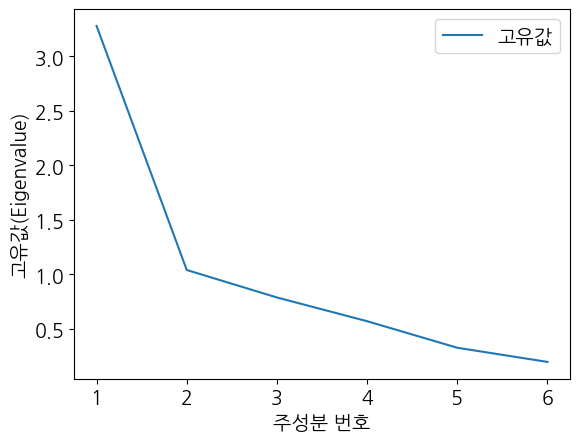

In [87]:
# 주성분 분석 및 결과 : scree plot 확인 및 주성분 개수 결정
# Scree plot
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'],label='고유값')
# 그래프 label, legend
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

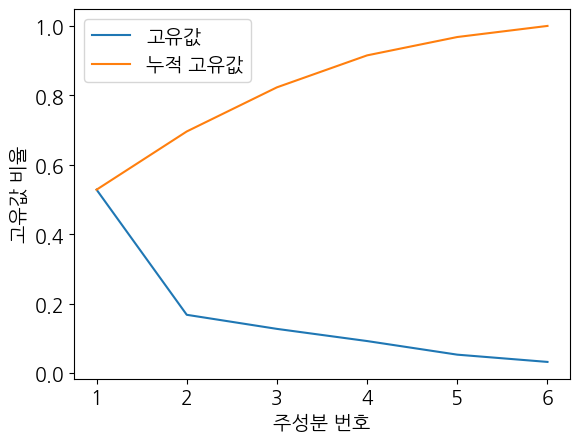

In [88]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['EigenValueRatio'],label='고유값')
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['CumEigenValueRatio'],label='누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

In [89]:
# 주성분 분석 및 결과 : 고유 벡터 확인 및 해석
# 주성분 분석 데이터의 변수 이름
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
# 주성분 prin1 ~ prin6 까지 고유벡터 저장
# 전치결과 pd.DataFRame(pca.components_, columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6']),axis=1
# 파이썬 pca 분석시 SVD 연산 방식의 차이 반영(전치 , 부호 변경)
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1 , columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


- 고유값 확인 및 주성분 해석
- 1 주성분 배움 기회와 승진 간의 양의 연관성
- 2 주성분은 불만처리와 특권 허용 간의 음의 연관성
- 분석가에 따라 다름

C:\Users\winju\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


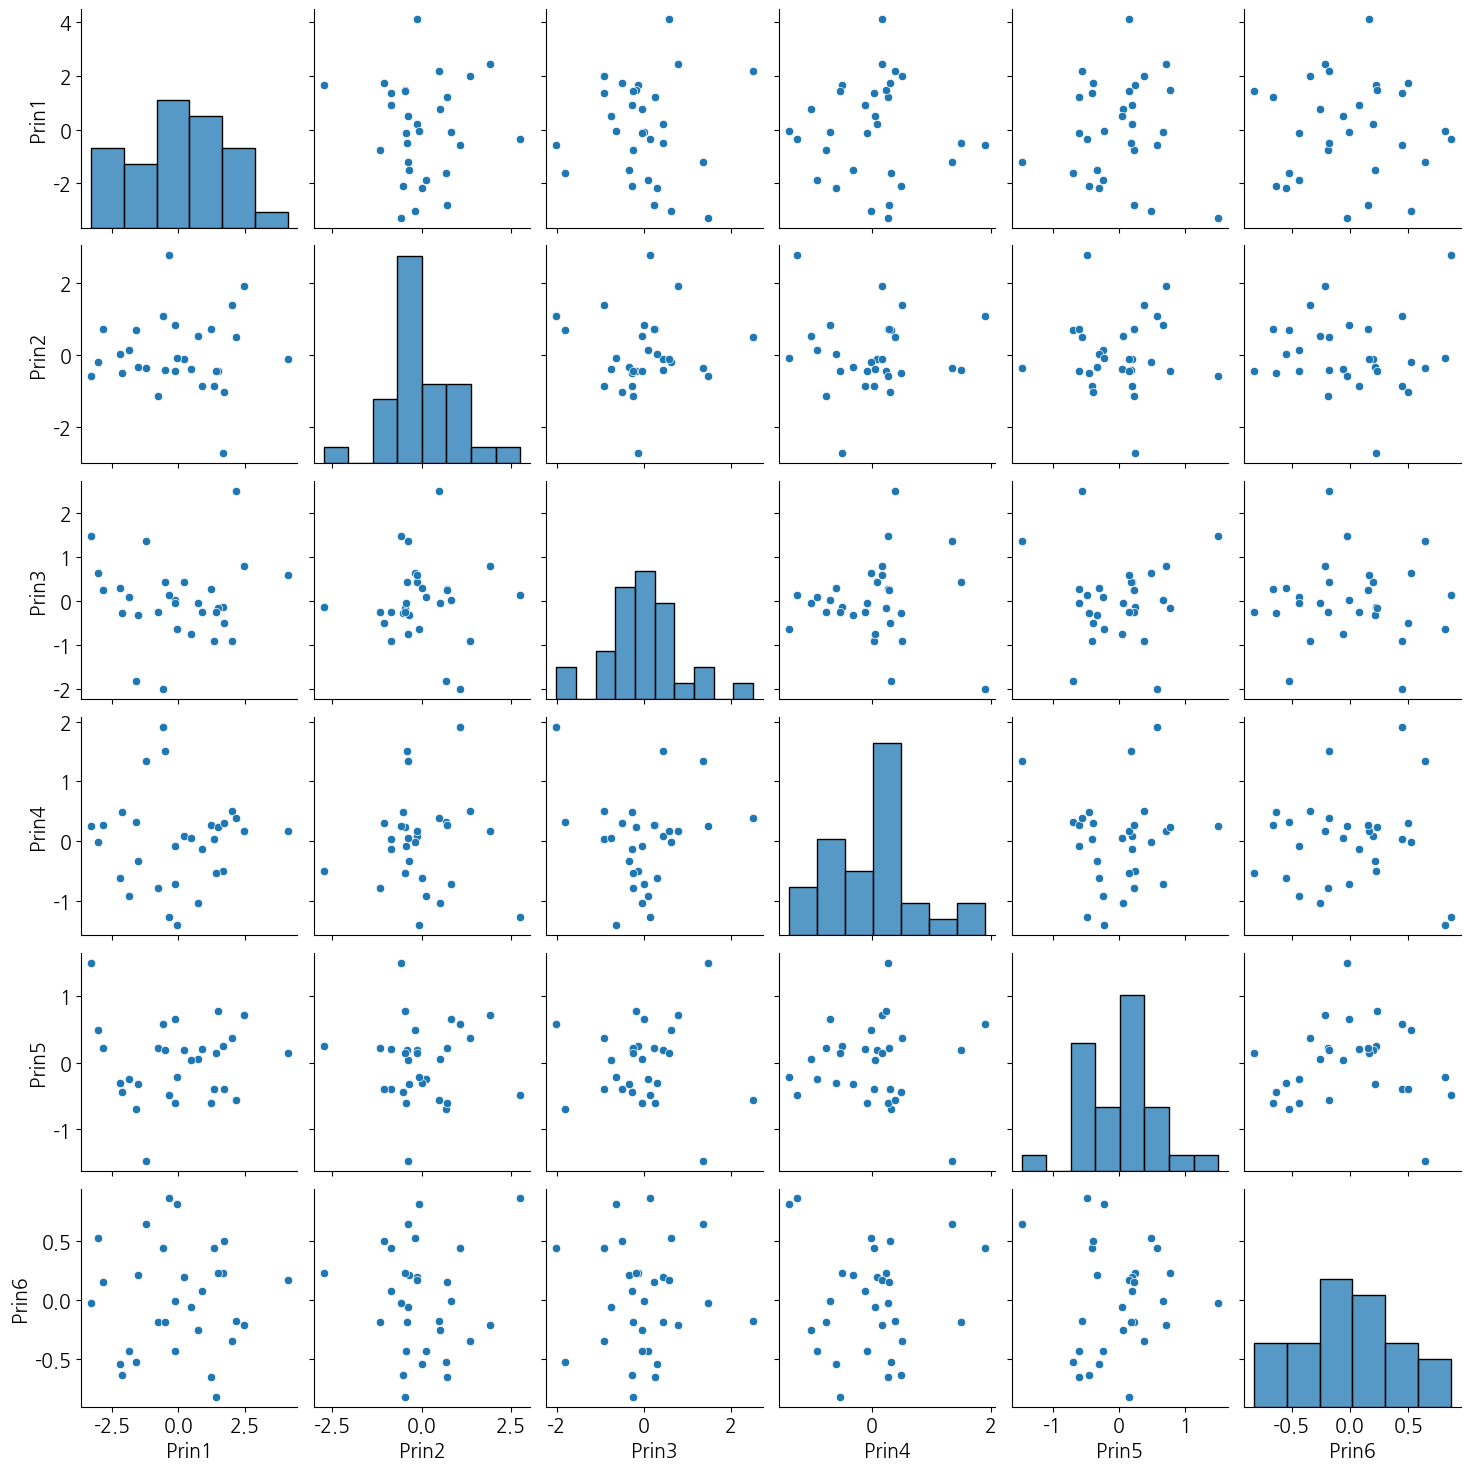

In [90]:
sns.pairplot(df_pca)

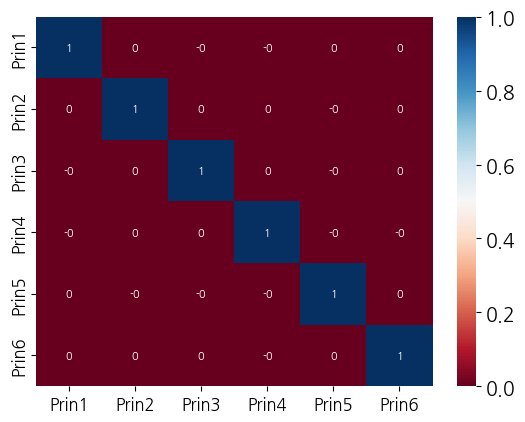

In [91]:
sns.heatmap(df_pca.corr().round(2),
            annot= True, annot_kws= {'size':8},
            cmap= 'RdBu')
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

- 주성분은 서로 독립 , 상관계수가 0 이다.

In [92]:
# 주성분 상관 / 회귀분석 : 회귀분석
# 다중선형 회귀분석 : 원천 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.24e-05
Time:                        03:12:23   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [93]:
# 다중선형 회귀분석 " Scale 변환 데이터 활용
# Scale 변환 데이터에 절편(const) 컬럼 추가
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.24e-05
Time:                        03:12:23   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [94]:
# 다중선형 주성분 회귀분석 : 주성분 점수(score) 데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var = ['Prin1','Prin2','Prin3']
# 선택된 주성분 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y , df_pca_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.02e-05
Time:                        03:12:23   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

- 전체 설명변수를 이용한 모델보다 3개 주성분을 이용한 회귀모델의 설명력이 약 11% 저하됨
- 기여율이 약한 주성분 3개 (prin4, 5, 6)을 제외하여 설명력이 저하됨
- 주성분 회귀분석의 회귀계수는 모두 유의